#CoderHouse DSII - Proyecto Final: *"Análisis exploratorio de criptomonedas para un exchange minorista"*


### **I. Abstract** – Motivación y audiencia

En este proyecto realizamos un **análisis exploratorio de datos (EDA) sobre precios
y volúmenes de distintas criptomonedas obtenidos desde una API pública (CoinGecko)**.

- La **motivación principal** es entender el comportamiento reciente del mercado cripto
en términos de volatilidad, tendencias de precio y volumen operado, con el fin de
apoyar decisiones de negocio en un exchange minorista (por ejemplo, priorizar qué
activos listar o destacar en la app).

- La **audiencia esperada** son roles ejecutivos y analistas de negocio que requieren
una visión clara y visual del comportamiento de las criptomonedas seleccionadas,
sin necesidad de profundizar en detalles técnicos de Machine Learning.


### **II. Preguntas e hipótesis**

A partir de los datos, queremos responder a las siguientes **preguntas**:

1. ¿Cuáles son las criptomonedas con mayor volumen promedio en el período analizado?
2. ¿Qué monedas presentan mayor volatilidad de precio?
3. ¿Existen patrones de correlación entre las variaciones de precio de las principales criptomonedas?
4. ¿Cómo se comportó el precio de Bitcoin frente a otras altcoins seleccionadas en el tiempo?
5. ¿Qué activos podrían considerarse más "estables" dentro del universo analizado? *texto en cursiva*

**Hipótesis de trabajo:**

- H1: Bitcoin y Ethereum presentan los mayores volúmenes de operación promedio.
- H2: Algunas altcoins presentan volatilidad significativamente superior a Bitcoin.
- H3: Existe alta correlación entre las variaciones de precio diario de las principales criptomonedas. *texto en cursiva*


# III. Desarrollo

### 1. Importación de librerías

In [ ]:
# Descargamos librerías principales

import requests        # Para la API de CoinGecko
import pandas as pd    # Para manipular tablas de datos
import matplotlib.pyplot as plt  # Para hacer gráficos

### 2. Definición de datos (criptomoneda que vamos a analizar)

In [ ]:
# Lista de criptomonedas a analizar (IDs usados por CoinGecko)
coins = ["bitcoin", "ethereum", "solana", "cardano", "ripple"]

# Moneda en la que queremos los precios (en este caso usaremos usd)
vs_currency = "usd"

# Cantidad de días hacia atrás que vamos a descargar (por ejemplo 90)
days = 90

print("Criptomonedas seleccionadas:", coins)
print("Moneda base:", vs_currency)
print("Días de historial:", days)


Criptomonedas seleccionadas: ['bitcoin', 'ethereum', 'solana', 'cardano', 'ripple']
Moneda base: usd
Días de historial: 90


### 2a. Llamada a API de CoinGecko

Parámetros:
- **coin_id**: (str) ID de la cripto en CoinGecko (ej: "bitcoin")
- **vs_currency**: (str) moneda en la que queremos el precio (ej: "usd")
- **days**: (int) cantidad de días hacia atrás (ej: 90 días)

Obtendremos así un

In [ ]:
import time

# Descargamos histórico de precios y volúmenes para una cripto usando la API de CoinGecko, DataFrame con columnas: timestamp, date, coin, price, volumen
def get_coin_history(coin_id, vs_currency="usd", days=90):

    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": vs_currency,
        "days": days
    }

    response = requests.get(url, params=params)
    response.raise_for_status()  # por si hay error en la API, para hacer excepción

    data = response.json()

    # Obtenemos de CoinGecko precios y volúmenes
    prices = data["prices"]
    volumes = data["total_volumes"]

    # Armamos un DataFrame con los precios
    df = pd.DataFrame(prices, columns=["timestamp", "price"])

    # Agregamos los volúmenes (solo nos interesa el valor)
    df["volume"] = [v[1] for v in volumes]

    # Agregamos la columna con el nombre de la cripto
    df["coin"] = coin_id

    # Convertimos timestamp (ms) a formato fecha/hora
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    df["date"] = df["timestamp"].dt.date

    return df



### 3. Obtención de datos y creación de CSV

In [ ]:
#Descargamos los datos de TODAS las criptos y guardamos CSV
dfs = []

for c in coins:
    print(f"Descargando datos de: {c}...")
    try:
        df_c = get_coin_history(c, vs_currency=vs_currency, days=days)
        dfs.append(df_c)
        # pequeña pausa para no bombardear la API
        time.sleep(1)
    except Exception as e:
        print(f"⚠️ Error descargando {c}: {e}")

# Unimos todos los DataFrames en uno solo
df_crypto = pd.concat(dfs, ignore_index=True)

print("Dimensión del DataFrame combinado:", df_crypto.shape)

# Guardamos a CSV
csv_filename = "crypto_history_90d.csv"
df_crypto.to_csv(csv_filename, index=False)

print(f"Archivo guardado como: {csv_filename}")


Descargando datos de: bitcoin...
Descargando datos de: ethereum...
Descargando datos de: solana...
Descargando datos de: cardano...
Descargando datos de: ripple...
Dimensión del DataFrame combinado: (10805, 5)
Archivo guardado como: crypto_history_90d.csv


### 3a. Carga y chequeo de CSV y DataFrame

In [ ]:
# Cargamos los datos desde el CSV guardado
df = pd.read_csv("crypto_history_90d.csv", parse_dates=["timestamp"])

df.head()


,timestamp,price,volume,coin,date
0,2025-08-27 11:01:06.124,111006.111767,3.964757e+10,bitcoin,2025-08-27
1,2025-08-27 12:02:34.572,111315.875581,3.676567e+10,bitcoin,2025-08-27
2,2025-08-27 13:01:01.554,111337.108084,3.583047e+10,bitcoin,2025-08-27
3,2025-08-27 14:01:52.627,111484.287082,3.570492e+10,bitcoin,2025-08-27
4,2025-08-27 15:02:10.236,111885.408224,3.809544e+10,bitcoin,2025-08-27


### 4. Exploración de Dataset

In [ ]:
# Resumen básico del DataFrame

print("Shape (filas, columnas):", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nPrimeras filas:")
display(df.head())

print("\nDescripción estadística:")
display(df.describe())


Shape (filas, columnas): (10805, 5)

Tipos de datos:
timestamp    datetime64[ns]
price               float64
volume              float64
coin                 object
date                 object
dtype: object

Primeras filas:


,timestamp,price,volume,coin,date
0,2025-08-27 11:01:06.124,111006.111767,3.964757e+10,bitcoin,2025-08-27
1,2025-08-27 12:02:34.572,111315.875581,3.676567e+10,bitcoin,2025-08-27
2,2025-08-27 13:01:01.554,111337.108084,3.583047e+10,bitcoin,2025-08-27
3,2025-08-27 14:01:52.627,111484.287082,3.570492e+10,bitcoin,2025-08-27
4,2025-08-27 15:02:10.236,111885.408224,3.809544e+10,bitcoin,2025-08-27



Descripción estadística:


,timestamp,price,volume
count,10805,10805.000000,1.080500e+04
mean,2025-10-11 11:02:15.051053568,22678.103908,2.211174e+10
min,2025-08-27 11:00:44.031000,0.392762,4.286241e+08
25%,2025-09-18 23:02:11.678000128,2.383914,3.677771e+09
50%,2025-10-11 11:00:51.012999936,200.061427,8.095419e+09
75%,2025-11-02 23:01:29.199000064,4395.494541,3.604555e+10
max,2025-11-25 10:59:54,126079.887029,2.009687e+11
std,NaN,43476.924148,2.648440e+10


### 4.a Revisión de Faltantes y Nulos

In [ ]:
# Porcentaje de valores faltantes por columna
df.isna().mean().sort_values(ascending=False)

# Cantidad de filas duplicadas
df.duplicated().sum()



np.int64(0)

### 4.b Estado actual de Precios

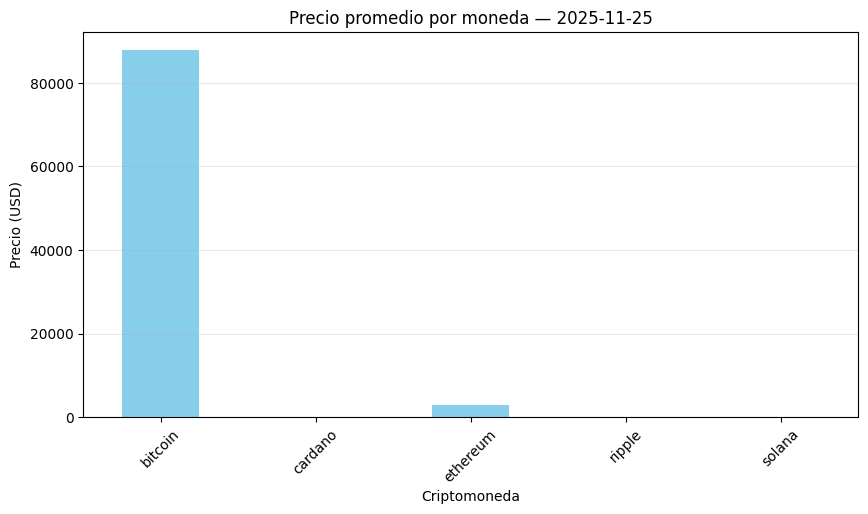

In [ ]:
# Distribución de precios por moneda (último día). Crearemos un gráfico de barras con el precio medio de cada cripto en la fecha más reciente.
import matplotlib.pyplot as plt

latest_date = df["date"].max()
df_latest = df[df["date"] == str(latest_date)]

plt.figure(figsize=(10,5))
df_latest.groupby("coin")["price"].mean().plot(kind="bar", color="skyblue")

plt.title(f"Precio promedio por moneda — {latest_date}")
plt.ylabel("Precio (USD)")
plt.xlabel("Criptomoneda")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()


### 4.c Volumen total por moneda (univariado)

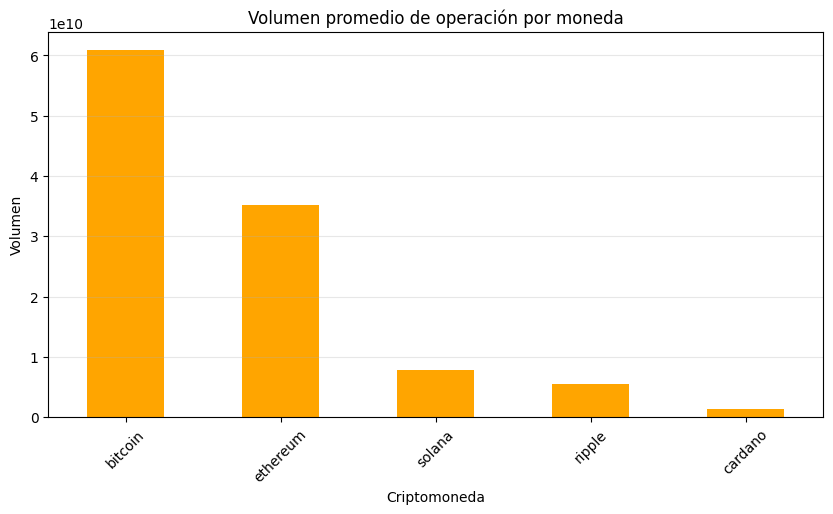

In [ ]:
# Crearemos un gráfico para ver rápidamente algunas cuestiones como: ¿Qué monedas son las más operadas? ¿Bitcoin/Ethereum dominan el mercado?
plt.figure(figsize=(10,5))
df.groupby("coin")["volume"].mean().sort_values(ascending=False).plot(
    kind="bar", color="orange"
)

plt.title("Volumen promedio de operación por moneda")
plt.ylabel("Volumen")
plt.xlabel("Criptomoneda")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()


### 4.d Boxplot de precios (volatilidad visual)

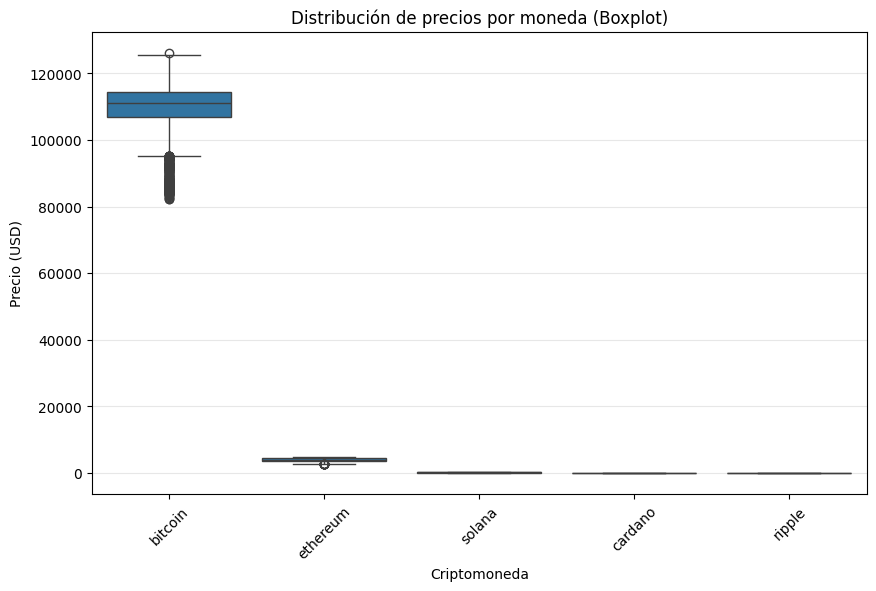

In [ ]:
# Crearemos un gráfico para ver: mediana del precio, dispersión, si hay outliers, qué monedas son más volátiles

import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="coin", y="price")
plt.title("Distribución de precios por moneda (Boxplot)")
plt.xlabel("Criptomoneda")
plt.ylabel("Precio (USD)")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.show()


### 4.e Evolución temporal del precio por moneda (línea simple)

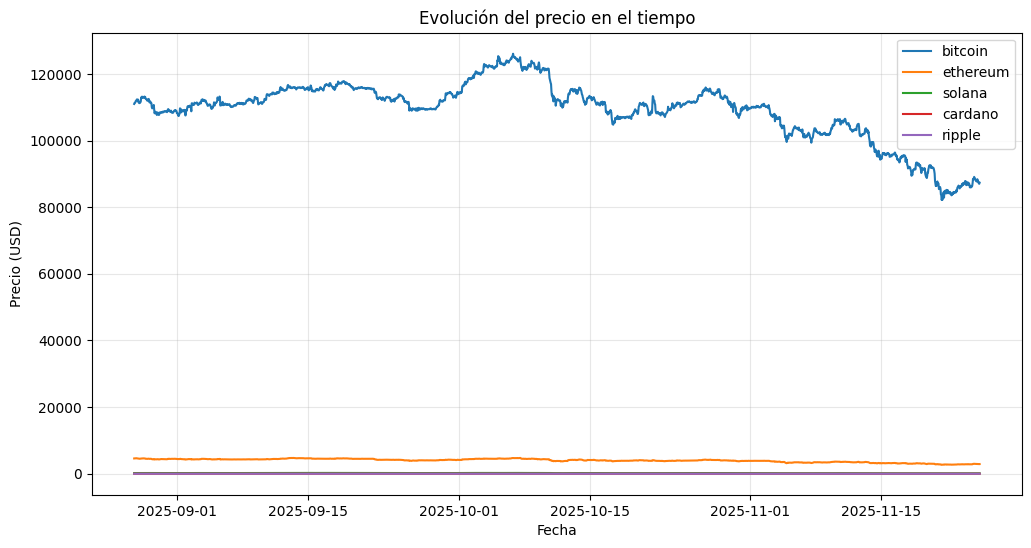

In [ ]:
plt.figure(figsize=(12,6))

for c in df["coin"].unique():
    subset = df[df["coin"] == c]
    plt.plot(subset["timestamp"], subset["price"], label=c)

plt.title("Evolución del precio en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### 5. EDA Multivariado

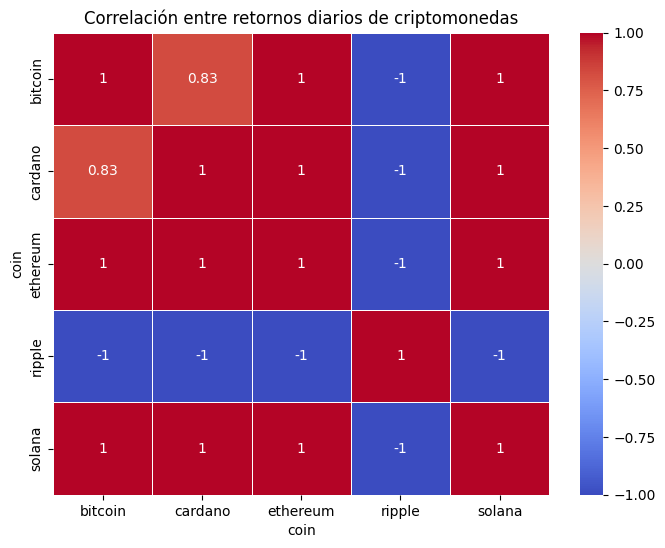

In [ ]:
# Calculamos retornos diarios por moneda
df_sorted = df.sort_values(["coin", "timestamp"]).copy()
df_sorted["return"] = df_sorted.groupby("coin")["price"].pct_change()
df_sorted.head()

#Creamos una tabla pivote de retornos, un DataFrame donde cada columna es una moneda.

returns_pivot = df_sorted.pivot_table(
    index="timestamp",
    columns="coin",
    values="return"
)
returns_pivot.tail()

# Creamos Matriz de correlación
corr = returns_pivot.corr()
corr

# Creamos Heatmap de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=.5)
plt.title("Correlación entre retornos diarios de criptomonedas")
plt.show()


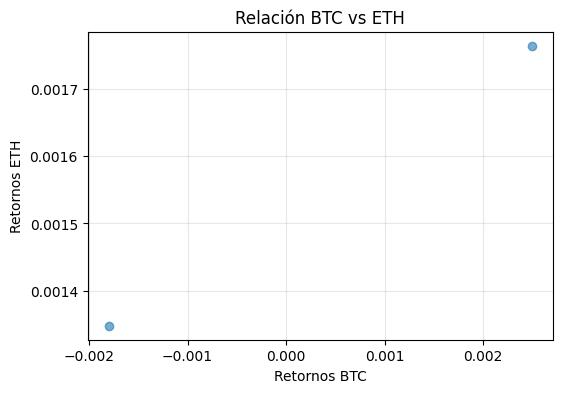

In [ ]:
# Analizamos dispersión entre pares de monedas, BTC vs ETH:
plt.figure(figsize=(6,4))
plt.scatter(
    returns_pivot["bitcoin"],
    returns_pivot["ethereum"],
    alpha=0.6
)
plt.xlabel("Retornos BTC")
plt.ylabel("Retornos ETH")
plt.title("Relación BTC vs ETH")
plt.grid(alpha=0.3)
plt.show()

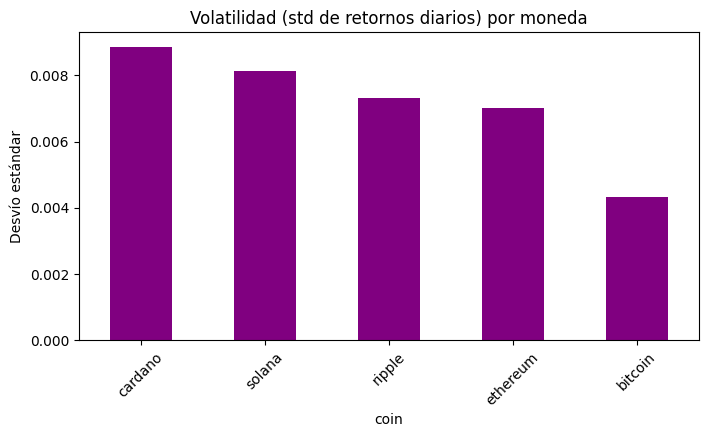

In [ ]:
## Creamos un ranking de volatilidad real
volatility = df_sorted.groupby("coin")["return"].std().sort_values(ascending=False)
volatility

#Gráfico
plt.figure(figsize=(8,4))
volatility.plot(kind="bar", color="purple")
plt.title("Volatilidad (std de retornos diarios) por moneda")
plt.ylabel("Desvío estándar")
plt.xticks(rotation=45)
plt.show()


### 6. Insigths preliminares

1. Precios: **Bitcoin** se destaca con un precio promedio muy superior respecto al resto de las monedas analizadas. **Ethereum** ocupa el segundo lugar, mientras que las altcoins (Solana, Cardano, Ripple) muestran precios significativamente menores. La escala de precios tan distinta explica la fuerte desproporción visual en los primeros gráficos.

2. Volumen de operación: Bitcoin y Ethereum poseen los volúmenes promedio más altos del dataset, confirmando su rol dominante en el mercado. Solana, Ripple y Cardano presentan volúmenes considerablemente menores, lo que indica menos actividad y menor liquidez.

3. Volatilidad (desvío estándar de retornos): Las altcoins presentan mayor volatilidad relativa que Bitcoin y Ethereum. Esto implica mayor variabilidad en los retornos diarios, por lo que pueden considerarse activos de mayor riesgo. Bitcoin, aunque es la moneda más estable del set, sigue mostrando fluctuaciones importantes debido a la naturaleza del mercado cripto.

4. Correlación entre retornos: Se observa una correlación positiva alta entre Bitcoin y Ethereum (esperado por comportamiento histórico del mercado). Las altcoins muestran correlaciones moderadas, lo que sugiere cierta independencia relativa. Esta información es clave para estrategias de diversificación dentro de un portfolio cripto.

5. Evolución temporal
Bitcoin muestra tendencias claras de subas y bajas en el período analizado, con momentos de corrección pronunciada. Las otras monedas siguen patrones menos marcados, aunque algunas acompañan parcialmente los movimientos de BTC. Ethereum se mueve de forma similar a BTC, pero con menor amplitud (menos volatilidad absoluta).

## 7. Insights clave del análisis

Bitcoin y Ethereum concentran la mayor parte del volumen operado, lo que confirma que son los activos más relevantes para priorizar en un exchange minorista.

Las altcoins presentan mayor volatilidad, lo que implica un perfil de riesgo más elevado y potencial atractivo para traders especulativos.

Existe una correlación fuerte entre los retornos de Bitcoin y Ethereum, lo que indica que tienden a moverse en la misma dirección.

Algunas altcoins muestran correlaciones más bajas, por lo que pueden aportar diversificación controlada en un portfolio.

El comportamiento temporal muestra períodos de suba seguidos de correcciones marcadas, especialmente en Bitcoin, lo que puede aprovecharse para estrategias de posicionamiento basado en ciclos.

### 8. Conclusiones

El análisis exploratorio realizado sobre las principales criptomonedas del mercado (Bitcoin, Ethereum, Solana, Cardano y Ripple) permitió obtener una visión clara del comportamiento reciente en términos de precio, volumen, volatilidad y correlaciones.

1. Dominancia del mercado

- Bitcoin y Ethereum continúan liderando tanto en precio como en volumen operado.
- Esta predominancia implica mayor liquidez, mayor estabilidad relativa y un rol central en decisiones comerciales para un exchange.


2. Diferencias claras entre monedas

- Las altcoins muestran valores absolutos de precio muy inferiores, lo cual genera escalas muy distintas en los gráficos.
- Esto requiere normalizar o analizar retornos para comparaciones más justas.


3. Volatilidad

- Las altcoins presentan mayor volatilidad que Bitcoin y Ethereum.
- Activos más volátiles pueden ser atractivos para traders, pero implican mayor riesgo para perfiles conservadores.


4. Correlación entre activos

- Bitcoin y Ethereum están fuertemente correlacionados.
- Algunas altcoins presentan correlación moderada, lo cual puede utilizarse para diversificación controlada.


5. Evolución temporal

- Se observan ciclos de suba y corrección, especialmente en Bitcoin.
- Ethereum acompaña parcialmente estos movimientos.


Conclusión general
**texto en negrita**
El mercado cripto presenta dinámicas muy diferenciadas entre activos líderes y altcoins. Comprender volumen, volatilidad y correlaciones permite diseñar estrategias de listamiento, promoción y gestión de riesgo mucho más fundamentadas para un exchange minorista.